In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [24]:
# Load the dataset
df = pd.read_csv("O:/virtual_intern/Codsoft-Machine Learning/Customer Churn Prediction/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [25]:
print(df.shape)

(10000, 14)


In [26]:
# Drop duplicate CustomerId
print(df.duplicated("CustomerId").sum())

0


In [27]:
# Set index to CustomerId
df.set_index("CustomerId", inplace=True)
df.head()

,RowNumber,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,,,
15634602,1,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
15647311,2,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,3,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
15701354,4,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
15737888,5,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64


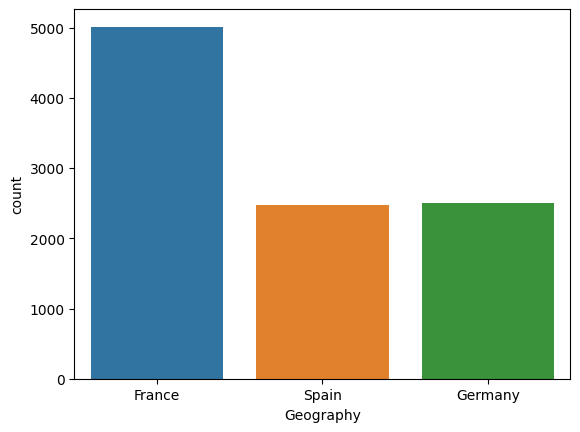

In [28]:
# Encoding categorical features
le = LabelEncoder()

print(df['Geography'].value_counts())

sns.countplot(x="Geography", data=df)
plt.show()


In [29]:
df['Geography'] = le.fit_transform(df['Geography'])

print(df['Geography'].value_counts())


Geography
0    5014
1    2509
2    2477
Name: count, dtype: int64


Gender
Male      5457
Female    4543
Name: count, dtype: int64


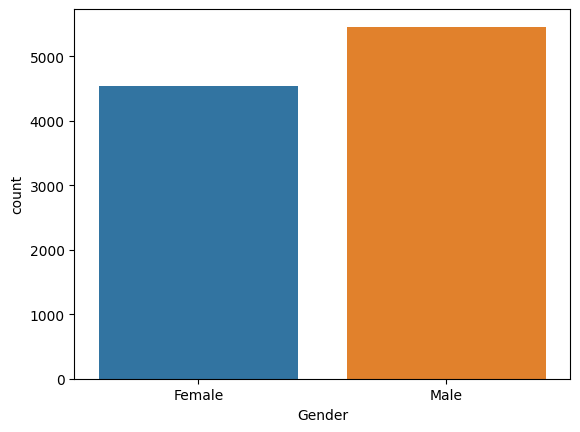

In [30]:
print(df['Gender'].value_counts())

sns.countplot(x="Gender", data=df)
plt.show()

In [31]:
df['Gender'] = le.fit_transform(df['Gender'])

print(df['Gender'].value_counts())


Gender
1    5457
0    4543
Name: count, dtype: int64


Exited
0    3117
1     500
Name: count, dtype: int64


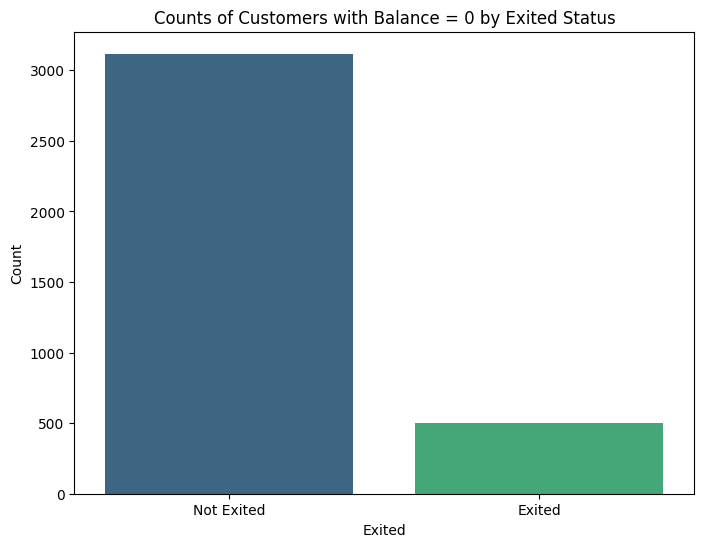

In [32]:
# Check Exited counts where Balance is 0
balance_zero_exited_counts = df.loc[(df["Balance"] == 0), "Exited"].value_counts()
print(balance_zero_exited_counts)

# Visualize the counts
plt.figure(figsize=(8, 6))
sns.barplot(x=balance_zero_exited_counts.index, y=balance_zero_exited_counts.values, palette="viridis")
plt.xlabel("Exited")
plt.ylabel("Count")
plt.title("Counts of Customers with Balance = 0 by Exited Status")
plt.xticks([0, 1], ['Not Exited', 'Exited'])
plt.show()

In [33]:
# Define features and target
X = df.drop(["RowNumber", "Surname", "Exited"], axis=1)
y = df["Exited"]

print(X.shape, y.shape)

(10000, 10) (10000,)


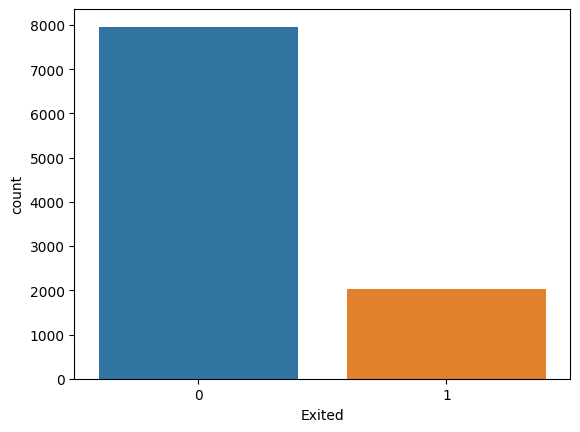

Exited
0    7963
1    2037
Name: count, dtype: int64


In [15]:
# Plot target variable distribution
sns.countplot(x=y)
plt.show()

print(y.value_counts())

Exited
0    7963
1    2037
Name: count, dtype: int64


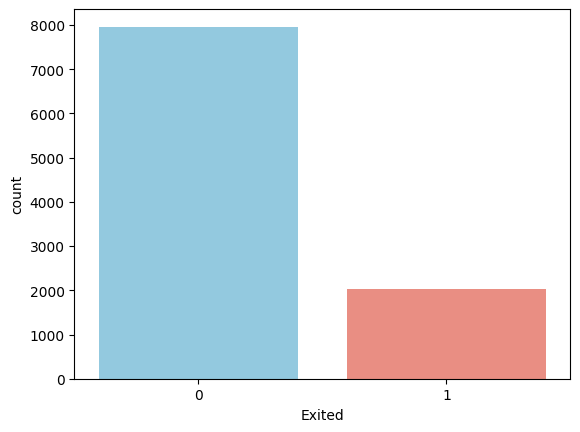

Exited
0    2037
1    2037
Name: count, dtype: int64


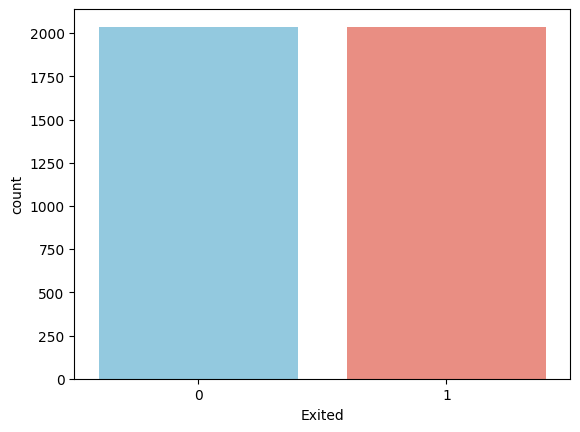

In [34]:
# Under Sampling
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X, y)
print(y.value_counts())
sns.countplot(x=y, palette={0: "skyblue", 1: "salmon"})
plt.show()
print(y_rus.value_counts())
sns.countplot(x=y_rus, palette={0: "skyblue", 1: "salmon"})
plt.show()

Exited
0    7963
1    2037
Name: count, dtype: int64


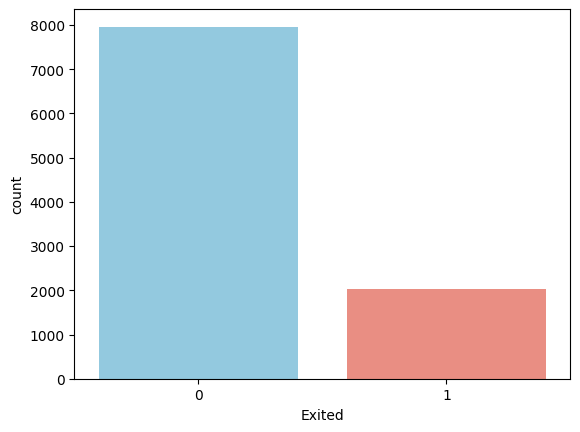

Exited
1    7963
0    7963
Name: count, dtype: int64


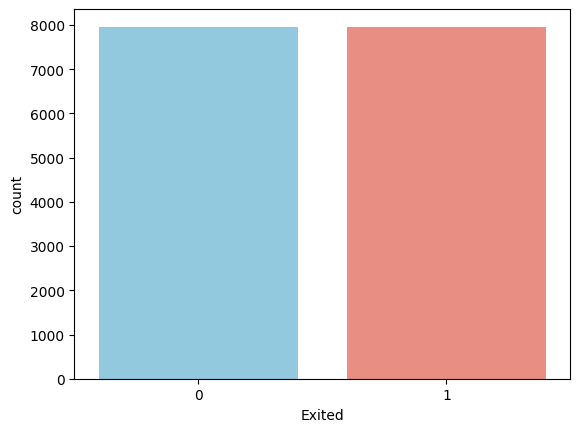

In [35]:
# Over Sampling
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X, y)
print(y.value_counts())
sns.countplot(x=y, palette={0: "skyblue", 1: "salmon"})
plt.show()
print(y_ros.value_counts())
sns.countplot(x=y_ros, palette={0: "skyblue", 1: "salmon"})
plt.show()

In [36]:
# Split Original Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split Under Sampled Data
X_rus_train, X_rus_test, y_rus_train, y_rus_test = train_test_split(X_rus, y_rus, test_size=0.2, random_state=42)

# Split Over Sampled Data
X_ros_train, X_ros_test, y_ros_train, y_ros_test = train_test_split(X_ros, y_ros, test_size=0.2, random_state=42)

In [37]:
print(X_train.shape,X_test.shape, y_train.shape,X.shape,y.shape)

print(X_rus_train.shape,X_rus_test.shape, y_rus_train.shape,X_rus.shape,y_rus.shape)

print(X_ros_train.shape,X_ros_test.shape, y_ros_train.shape,X_ros.shape,y_ros.shape)

(8000, 10) (2000, 10) (8000,) (10000, 10) (10000,)
(3259, 10) (815, 10) (3259,) (4074, 10) (4074,)
(12740, 10) (3186, 10) (12740,) (15926, 10) (15926,)


In [38]:
# Standardize the features
sc = StandardScaler()

def standardize_data(X_train, X_test):
    X_train[["Age", "Tenure", "Balance", "EstimatedSalary"]] = sc.fit_transform(X_train[["Age", "Tenure", "Balance", "EstimatedSalary"]])
    X_test[["Age", "Tenure", "Balance", "EstimatedSalary"]] = sc.transform(X_test[["Age", "Tenure", "Balance", "EstimatedSalary"]])
    return X_train, X_test

# Standardize Original Data
X_train, X_test = standardize_data(X_train, X_test)

# Standardize Under Sampled Data
X_rus_train, X_rus_test = standardize_data(X_rus_train, X_rus_test)

# Standardize Over Sampled Data
X_ros_train, X_ros_test = standardize_data(X_ros_train, X_ros_test)

In [39]:
# Function to train and evaluate models
def train_and_evaluate(X_train, y_train, X_test, y_test):
    models = {
        "Logistic Regression": LogisticRegression(),
        "SVM": SVC(kernel="linear"),
        "Random Forest": RandomForestClassifier(n_estimators=100,random_state=42)
    }

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)
        class_report = classification_report(y_test, y_pred)
        
        print(f"{name} - Accuracy: {accuracy*100:.2f}%")
        print(f"Confusion Matrix:\n{conf_matrix}")
        print(f"Classification Report:\n{class_report}")
        print("\n")

# Apply models on Original Data
print("Original Data:")
train_and_evaluate(X_train, y_train, X_test, y_test)

Original Data:
Logistic Regression - Accuracy: 81.65%
Confusion Matrix:
[[1560   47]
 [ 320   73]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.61      0.19      0.28       393

    accuracy                           0.82      2000
   macro avg       0.72      0.58      0.59      2000
weighted avg       0.79      0.82      0.77      2000



SVM - Accuracy: 80.70%
Confusion Matrix:
[[1595   12]
 [ 374   19]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.99      0.89      1607
           1       0.61      0.05      0.09       393

    accuracy                           0.81      2000
   macro avg       0.71      0.52      0.49      2000
weighted avg       0.77      0.81      0.73      2000



Random Forest - Accuracy: 86.45%
Confusion Matrix:
[[1545   62]
 [ 209  184]]
Classification Report:
              precision    r

In [40]:
# Apply models on Under Sampled Data
print("Under Sampled Data:")
train_and_evaluate(X_rus_train, y_rus_train, X_rus_test, y_rus_test)

Under Sampled Data:
Logistic Regression - Accuracy: 69.33%
Confusion Matrix:
[[307 136]
 [114 258]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.69      0.71       443
           1       0.65      0.69      0.67       372

    accuracy                           0.69       815
   macro avg       0.69      0.69      0.69       815
weighted avg       0.70      0.69      0.69       815





C:\Users\DEBANGA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVM - Accuracy: 70.18%
Confusion Matrix:
[[311 132]
 [111 261]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.70      0.72       443
           1       0.66      0.70      0.68       372

    accuracy                           0.70       815
   macro avg       0.70      0.70      0.70       815
weighted avg       0.70      0.70      0.70       815



Random Forest - Accuracy: 75.83%
Confusion Matrix:
[[356  87]
 [110 262]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.80      0.78       443
           1       0.75      0.70      0.73       372

    accuracy                           0.76       815
   macro avg       0.76      0.75      0.76       815
weighted avg       0.76      0.76      0.76       815





In [41]:
# Apply models on Over Sampled Data
print("Over Sampled Data:")
train_and_evaluate(X_ros_train, y_ros_train, X_ros_test, y_ros_test)

Over Sampled Data:
Logistic Regression - Accuracy: 69.27%
Confusion Matrix:
[[1139  494]
 [ 485 1068]]
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.70      0.70      1633
           1       0.68      0.69      0.69      1553

    accuracy                           0.69      3186
   macro avg       0.69      0.69      0.69      3186
weighted avg       0.69      0.69      0.69      3186



SVM - Accuracy: 68.42%
Confusion Matrix:
[[1086  547]
 [ 459 1094]]
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.67      0.68      1633
           1       0.67      0.70      0.69      1553

    accuracy                           0.68      3186
   macro avg       0.68      0.68      0.68      3186
weighted avg       0.69      0.68      0.68      3186



Random Forest - Accuracy: 94.73%
Confusion Matrix:
[[1500  133]
 [  35 1518]]
Classification Report:
              precision 

the Random Forest model on the oversampled data is accuracy , precision and recall is very good comparing to other models and other sample data

Random Forest Model Accuracy on Over Sampling Data: 94.73%
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.92      0.95      1633
           1       0.92      0.98      0.95      1553

    accuracy                           0.95      3186
   macro avg       0.95      0.95      0.95      3186
weighted avg       0.95      0.95      0.95      3186



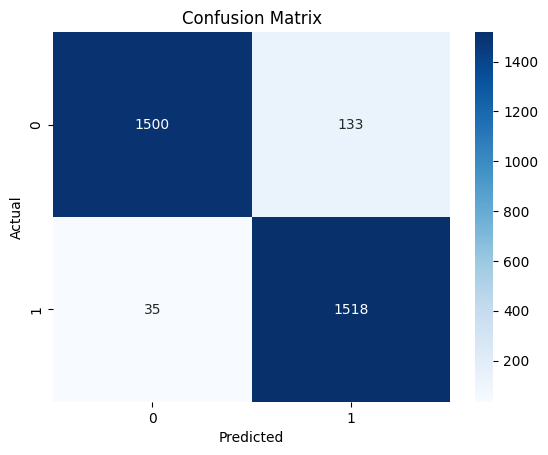

In [43]:
# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100,random_state=42)
rf_model.fit(X_ros_train, y_ros_train)

# Evaluate the model
y_pred = rf_model.predict(X_ros_test)
accuracy = accuracy_score(y_ros_test, y_pred)
print(f"Random Forest Model Accuracy on Over Sampling Data: {accuracy*100:.2f}%")
print("Classification Report:")
print(classification_report(y_ros_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_ros_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [48]:
# Function to predict churn for new data
def predict_churn(new_data):
    # Encode categorical features
    new_data["Geography"] = le.fit_transform(new_data["Geography"])
    new_data["Gender"] = le.fit_transform(new_data["Gender"])
    
    # Standardize numerical features
    new_data[["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary"]] = sc.fit_transform(
        new_data[["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary"]]
    )
    
    # Predict churn
    predictions = rf_model.predict(new_data)
    new_data["Predicted_Churn"] = predictions
    new_data["Predicted_Churn_Label"] = new_data["Predicted_Churn"].map({1: "Churn", 0: "No Churn"})
    return new_data

# Example usage of the predictive function
new_customer_data = pd.DataFrame({
    "CreditScore": [600, 850],
    "Geography": [0, 1],#France:0, Germany:1, Spain:2
    "Gender": [1, 0],# Male:0, Female:1
    "Age": [40, 30],
    "Tenure": [5, 3],
    "Balance": [60000, 80000],
    "NumOfProducts": [2, 1],
    "HasCrCard": [1, 0],
    "IsActiveMember": [1, 1],
    "EstimatedSalary": [50000, 70000]
})

predictions_df = predict_churn(new_customer_data)
predictions_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Predicted_Churn,Predicted_Churn_Label
0,-1.0,0,1,1.0,1.0,-1.0,1.0,1,1,-1.0,1,Churn
1,1.0,1,0,-1.0,-1.0,1.0,-1.0,0,1,1.0,0,No Churn
